In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
search_ffi = lk.search_tesscut('TIC 152477897')

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,TESScut,1426,TIC 152477897,0.0
1,TESS Sector 05,2018,TESScut,1426,TIC 152477897,0.0
2,TESS Sector 31,2020,TESScut,475,TIC 152477897,0.0
3,TESS Sector 32,2020,TESScut,475,TIC 152477897,0.0


In [4]:
search_tpf = lk.search_targetpixelfile('TIC 152477897')

In [5]:
search_tpf

SearchResult containing 0 data products.

In [6]:
search_lcf = lk.search_lightcurve('TIC 152477897')

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 04,2018,QLP,1800,152477897,0.0
1,TESS Sector 04,2018,GSFC-ELEANOR-LITE,1800,152477897,0.0
2,TESS Sector 04,2018,TASOC,1800,152477897,0.0
3,TESS Sector 04,2018,TASOC,1800,152477897,0.0
4,TESS Sector 05,2018,QLP,1800,152477897,0.0
5,TESS Sector 05,2018,TASOC,1800,152477897,0.0
6,TESS Sector 05,2018,TASOC,1800,152477897,0.0
7,TESS Sector 31,2020,QLP,600,152477897,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve('TIC 152477897', author="QLP", exptime=600)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 31,2020,QLP,600,152477897,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 152477897" SECTOR=31 AUTHOR=QLP FLUX_ORIGIN=sap_flux>

In [12]:
lcf[0]

time,flux,flux_err,cadenceno,sap_flux,kspsap_flux,kspsap_flux_err,quality,orbitid,sap_x,sap_y,sap_bkg,sap_bkg_err,kspsap_flux_sml,kspsap_flux_lag
,,,,,,,,,pix,pix,,,,
Time,float32,float32,int32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32
2144.5201900374323,0.9673779010772705,0.004519886337220669,132056,0.9673779,1.0031652,0.0045198863,4096,69,2028.244384765625,1480.159912109375,293.12,194.66,1.0010029,1.0003061
2144.5271345920914,0.9660727977752686,0.004519886337220669,132057,0.9660728,1.0011969,0.0045198863,4096,70,2028.2421875,1480.161376953125,190.15,186.88,1.0001725,0.9965962
2144.534079146751,0.9571882486343384,0.004519886337220669,132058,0.95718825,0.99142474,0.0045198863,4096,0,2028.2413330078125,1480.1575927734375,289.17,198.24,0.9940353,0.98701996
2144.541023701411,0.9677459001541138,0.004519886337220669,132059,0.9677459,1.0018332,0.0045198863,4096,0,2028.24365234375,1480.1595458984375,229.0,146.24,1.0025511,1.0001097
2144.547968255661,0.9650945067405701,0.004519886337220669,132060,0.9650945,0.99860555,0.0045198863,4096,0,2028.2415771484375,1480.15966796875,171.99,189.58,1.0009272,0.9948626
2144.5549128095604,0.9727576971054077,0.004519886337220669,132061,0.9727577,1.0060897,0.0045198863,4096,0,2028.2396240234375,1480.159912109375,214.12,202.82,1.0019552,1.0045148
2144.561857363461,0.973713219165802,0.004519886337220669,132062,0.9737132,1.0066725,0.0045198863,4096,0,2028.2449951171875,1480.156982421875,151.2,205.04,1.0045744,1.0084606
2144.5688019173604,0.9747440814971924,0.004519886337220669,132063,0.9747441,1.0073713,0.0045198863,4096,0,2028.242919921875,1480.160400390625,174.78,176.55,1.0043534,1.0098532


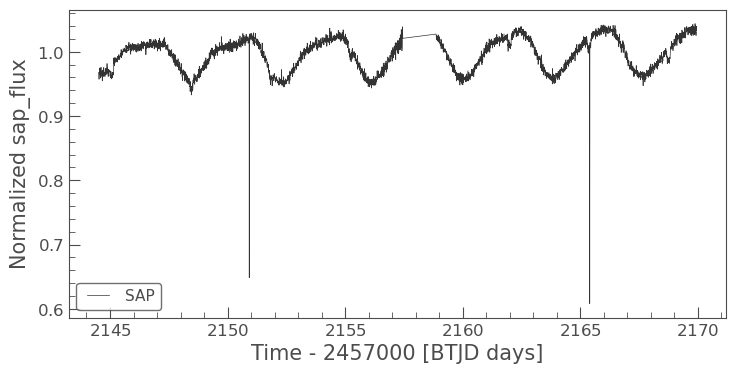

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");

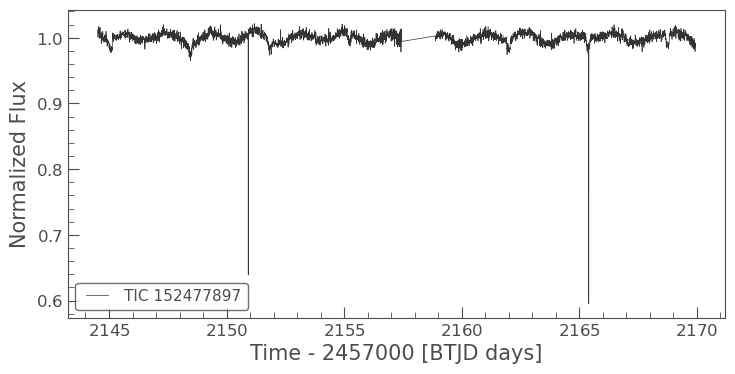

In [14]:
flat_lc = lcf[0].flatten(window_length=401)
flat_lc.plot();

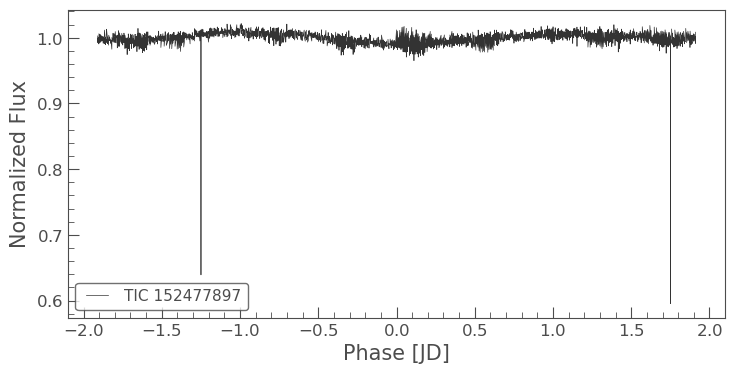

In [15]:
folded_lc = flat_lc.fold(period=3.826234262342623538)
folded_lc.plot();

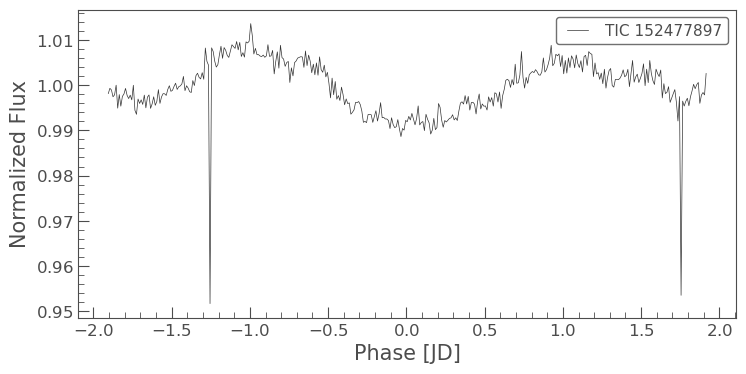

In [16]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

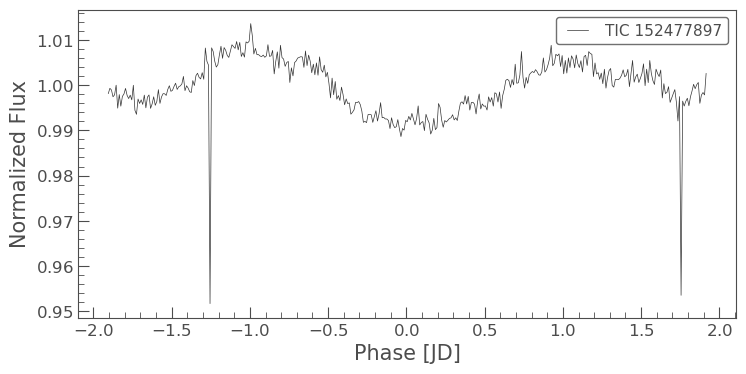

In [17]:
lcf[0].flatten(window_length=401).fold(period=3.826234262342623538).bin(time_bin_size=0.01).plot();

In [18]:
lcf[0].interact_bls()

In [19]:
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 152477897, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

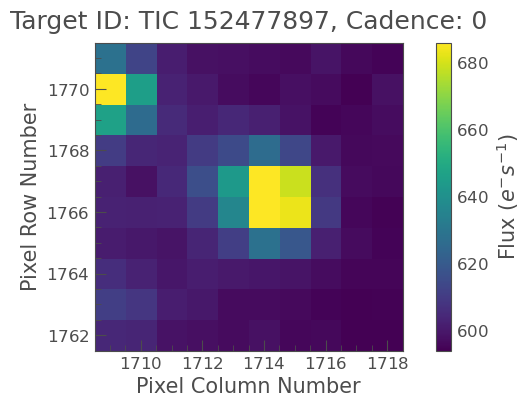

In [20]:
ffi_data.plot()

In [21]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

5

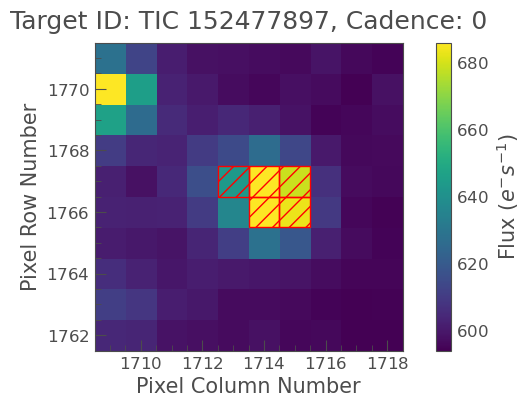

In [22]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [23]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [24]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
1437.993062221483,3480.1201171875,1.6727526187896729,1714.2064100907414,1766.5922294089223,0,0
1438.0138956063488,3138.49951171875,1.5941581726074219,1714.2073042242364,1766.5919206904175,1,0
1438.0347289921474,2847.318359375,1.5235559940338135,1714.2071720444196,1766.5916321861237,2,0
1438.055562378644,2584.152099609375,1.4576166868209839,1714.2089731727542,1766.5902526333562,3,0
1438.076395766071,2338.43359375,1.3925961256027222,1714.2081252354299,1766.5888712119283,4,0
1438.0972291539645,2129.212890625,1.3353111743927002,1714.2094997125414,1766.5888366165377,5,0
1438.1180625425563,1950.9180908203125,1.283607840538025,1714.2100122538461,1766.5874662219892,6,0
1438.13889593138,1787.1199951171875,1.2349668741226196,1714.2113834091288,1766.5862541663857,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

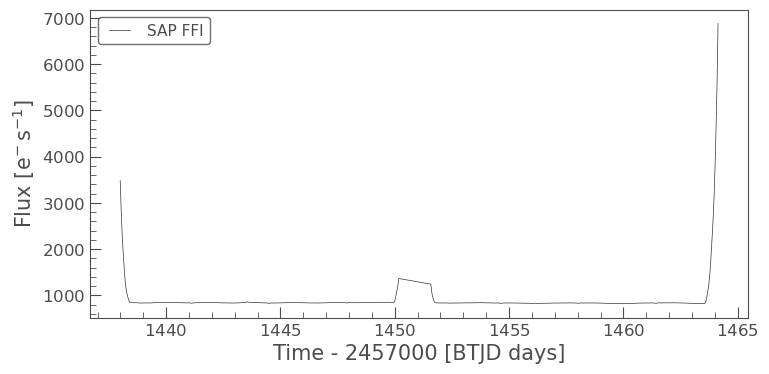

In [25]:
ffi_lc.plot(label="SAP FFI")

In [26]:
ffi_data.interact()

In [27]:
ffi_data.interact_sky()

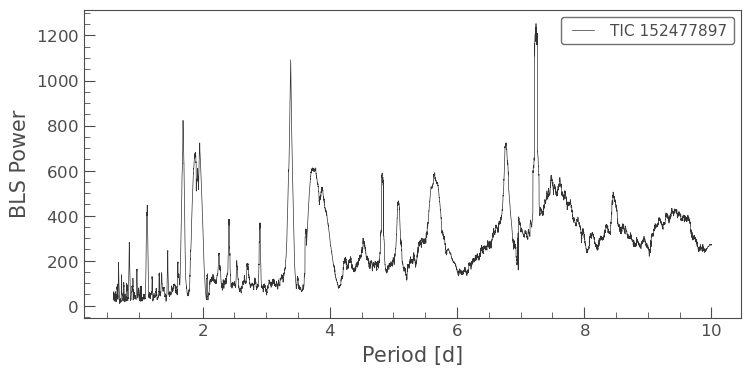

In [28]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [29]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 7.240 d


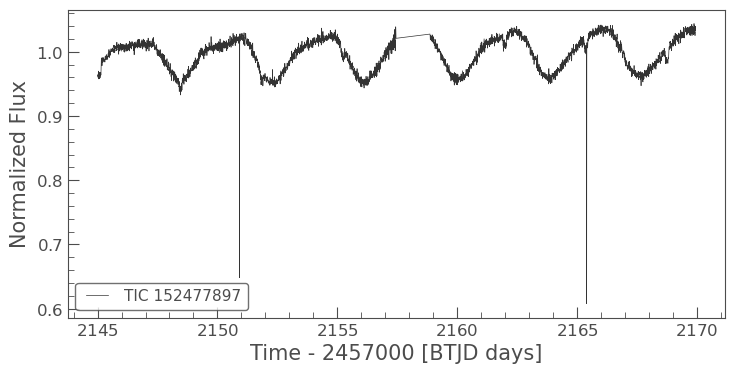

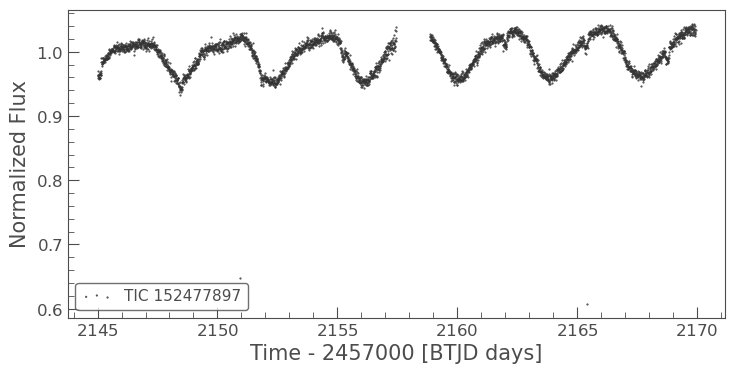

In [30]:
mask = ((lcf[0].time.value < 2170)&(lcf[0].time.value > 2145))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [31]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 12913.880299)

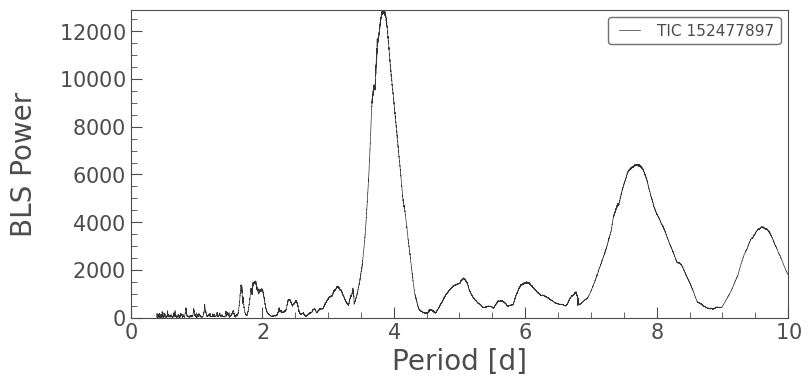

In [32]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 12913.880299])

In [33]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [34]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 3.847546475464755478 d
BLS max power = 12913.880299
Epoch max power = 2459148.446309
----------------------------------------
Period at 2th max power = 3.847250472504725405 d
BLS max power = 12913.880299
Epoch max power = 2459148.446309
----------------------------------------
Period at 3th max power = 3.840146401464014758 d
BLS max power = 12893.779309
Epoch max power = 2459148.446309
----------------------------------------
Period at 4th max power = 3.840442404424044387 d
BLS max power = 12893.779309
Epoch max power = 2459148.446309
----------------------------------------
Period at 5th max power = 3.840738407384074016 d
BLS max power = 12893.779309
Epoch max power = 2459148.446309
----------------------------------------
Period at 6th max power = 3.839850398503984685 d
BLS max power = 12883.315614
Epoch max power = 2459148.441309
----------------------------------------
Period at 7th max power = 3.833042330423304556 d
BLS max power = 12882.919732
Epoch max 

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(0.93, 1.05)

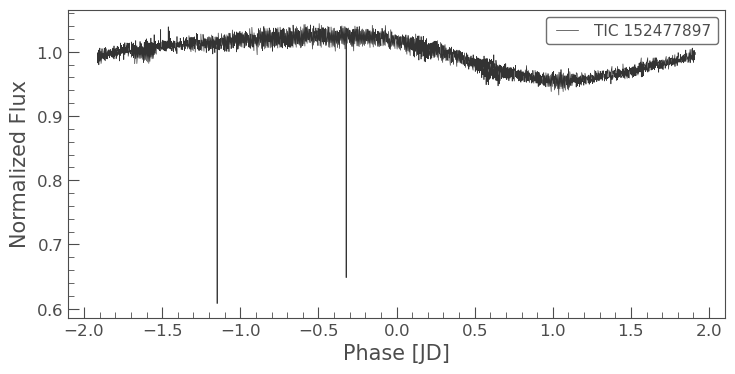

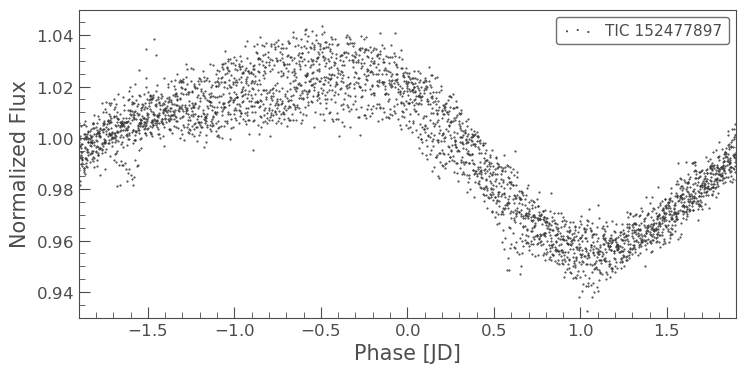

In [35]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 3.826234262342623538
epochtime = 2459148.446309
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.9,1.9)
plt.ylim([0.93,1.05])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(0.93, 1.05)

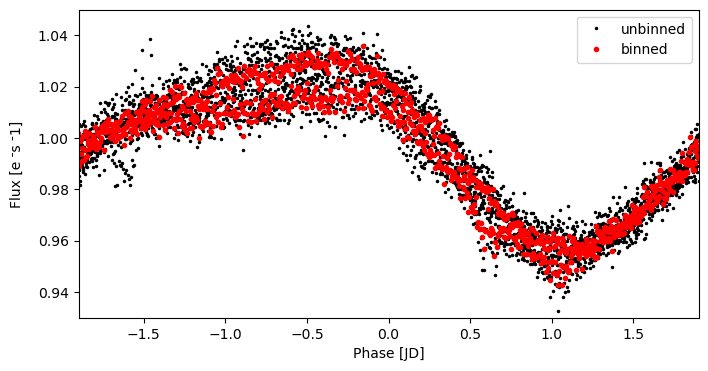

In [36]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1.9,1.9)
plt.ylim([0.93,1.05])

In [37]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.8298693299293518
median flux = 1.0024099946022034
Tdepth =  0.17254066467285156
Tdepth in ppm =  172540.66467285156 ppm
Rp/Rs ratio =  0.4153801447744603


In [38]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [39]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 7.92 d hours


In [40]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.042803043041018445
depth in ppm = 42803.04304101844 ppm


In [41]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

3.8475464754647555 d
2148.4463085442694
0.33 d


In [42]:
P = 3.847546475464755478 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.06 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 7329632542.812998 m
a = 7329632.5428129975 km
a = 0.04899556641046471 AU
The planetary mass was neglected


In [43]:
L = 2.425624 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.484962197253764 AU
The outer boundary of the habitable zone ro = 2.13931041613969 AU


In [44]:
Rs = 1.51722 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 438849.52786678245 km
Rp= 68.88236193168771 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 6.937648632269863


In [45]:
P = 3.847546475464755478 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 101854.03814405383 m/s


print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')